# Análisis de Tendencias en el Mercado Laboral Remoto

Este proyecto tiene como objetivo analizar cómo el trabajo remoto, híbrido y presencial afecta la salud mental, los niveles de estrés y la satisfacción laboral. Utilizaremos el dataset "Remote Work & Mental Health" disponible en Kaggle.

## Objetivos del Proyecto:

1. Explorar los datos relacionados con la modalidad de trabajo (remoto, híbrido, presencial).

2. Identificar correlaciones entre las modalidades laborales y el estrés y otros indicadores.

3. Presentar conclusiones a través de visualizaciones interactivas y narrativas basadas en datos.

In [18]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np



# Cargar el dataset
file_path = '../data/raw/Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(file_path)

# Vista inicial de los datos
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Primeras filas del dataset:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1   

## Observaciones iniciales:

- El dataset cuenta con columnas relacionadas con la modalidad de trabajo (Work_Location), niveles de estrés (Stress_Level) y satisfacción laboral (Satisfaction_with_Remote_Work), entre otras.

- Identificaremos valores faltantes, inconsistencias y normalizaremos columnas si es necesario.

In [19]:
# Identificar valores faltantes
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Limpiar datos rellenando valores nulos con la moda
for column in df.columns:
    most_frequent = df[column].mode()[0]  # Obtener la moda de cada columna
    df[column].fillna(most_frequent, inplace=True)

print("\nDataset después de rellenar valores faltantes:")
print(df.info())

# Guardar los datos limpios
cleaned_path = '../data/processed/cleaned_data.csv'
df.to_csv(cleaned_path, index=False)
print("\nDatos limpios guardados en:", cleaned_path)


Valores faltantes por columna:
Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

Dataset después de rellenar valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to

C:\Users\david\AppData\Local\Temp\ipykernel_4884\3742264960.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(most_frequent, inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_4884\3742264960.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

## Análisis Exploratorio de Datos (EDA) - Mercado Laboral Remoto

En esta sección, exploraremos las principales características del dataset después de la limpieza. Realizaremos un análisis visual y estadístico para identificar patrones y tendencias.

In [20]:
# Importar librerías necesarias para el análisis y las visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Configuración general para gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Vista general del dataset
print("\nPrimeras filas del dataset después de la limpieza:")
print(df.head())

print("\nDescripción estadística del dataset:")
print(df.describe())


Primeras filas del dataset después de la limpieza:
  Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4     

<Figure size 1000x600 with 0 Axes>

## Distribución de las Modalidades de Trabajo

Vamos a analizar la distribución de los empleados en cada modalidad de trabajo (Work_Location).

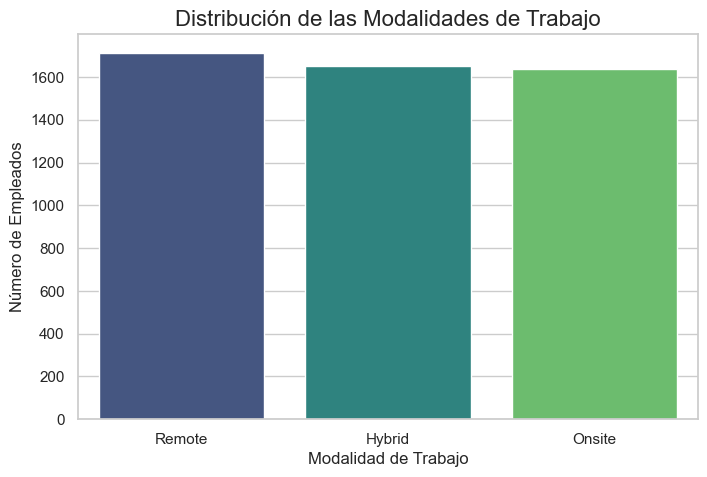

In [31]:
# Distribución de modalidades de trabajo
work_location_counts = df['Work_Location'].value_counts()

# Visualización
plt.figure(figsize=(8, 5))
sns.barplot(x=work_location_counts.index, y=work_location_counts.values, palette="viridis", hue=work_location_counts.index)
plt.title("Distribución de las Modalidades de Trabajo", fontsize=16)
plt.xlabel("Modalidad de Trabajo", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)
plt.show()


## Relación entre Modalidad de Trabajo y Niveles de Estrés

Vamos a explorar cómo varían los niveles de estrés (Stress_Level) según la modalidad de trabajo (Work_Location).

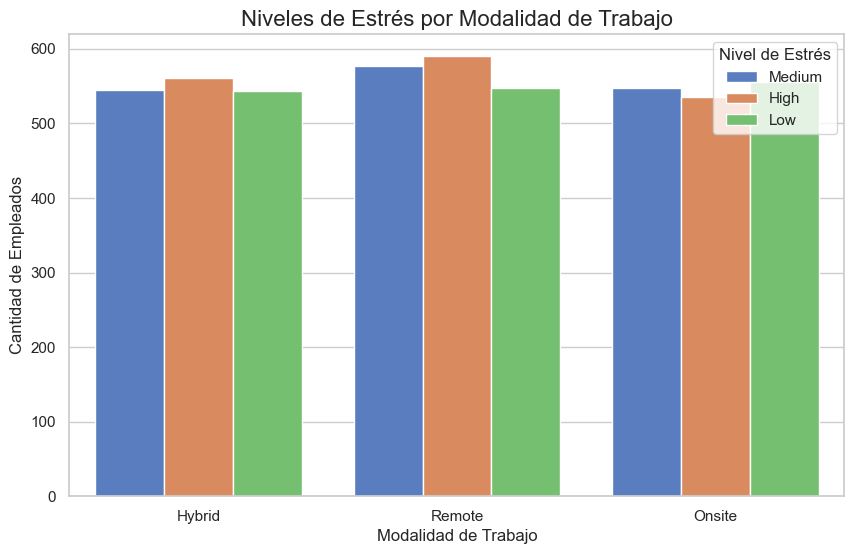

In [40]:
# Análisis de niveles de estrés por modalidad
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work_Location', hue='Stress_Level', palette="muted")
plt.title("Niveles de Estrés por Modalidad de Trabajo", fontsize=16)
plt.xlabel("Modalidad de Trabajo", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)
plt.legend(title="Nivel de Estrés", loc="upper right")
plt.savefig('../reports/stress_by_work_location.png')  # Guardar en la carpeta reports
plt.show()


## Distribución de la Satisfacción Laboral con el Trabajo Remoto

Analizaremos las categorías de satisfacción laboral para entender la percepción de los empleados sobre el trabajo remoto (Satisfaction_with_Remote_Work).

C:\Users\david\AppData\Local\Temp\ipykernel_4884\552042258.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette="coolwarm")


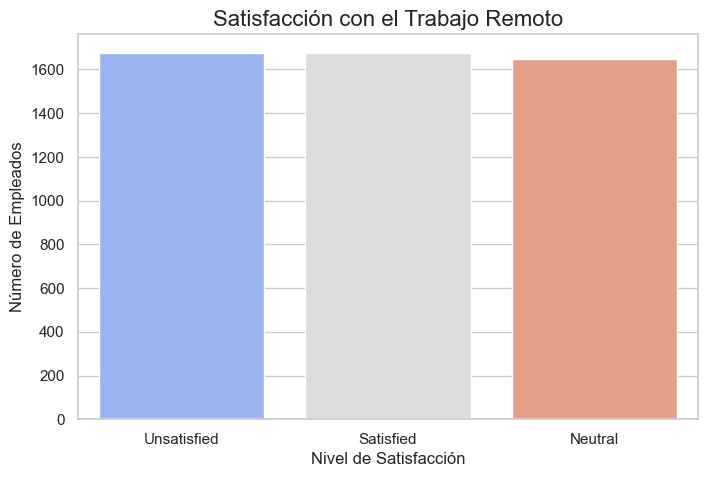

In [39]:
# Visualización de satisfacción laboral
satisfaction_counts = df['Satisfaction_with_Remote_Work'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values, palette="coolwarm")
plt.title("Satisfacción con el Trabajo Remoto", fontsize=16)
plt.xlabel("Nivel de Satisfacción", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)
plt.show()


## Conclusión del EDA

1. Distribución de Modalidades de Trabajo:

- El dataset presenta una distribución bastante equilibrada entre las tres modalidades: remota, híbrida y presencial. Esto es ideal para comparaciones, ya que no está dominado por una sola modalidad, y permite explorar de manera justa el impacto de cada tipo de trabajo en la salud mental y la satisfacción laboral.

2. Relación entre Modalidades de Trabajo y Niveles de Estrés:

- El gráfico muestra que ninguna modalidad destaca claramente como la menos estresante. Todos los niveles de estrés (bajo, medio y alto) están presentes en las tres modalidades de trabajo. Esto sugiere que el estrés no depende únicamente de la modalidad de trabajo, sino de una combinación de factores, como el tipo de industria, la carga laboral, y las características individuales de los empleados.

3. Patrones en la Satisfacción con el Trabajo Remoto:

- Aunque muchos empleados reportan estar satisfechos con el trabajo remoto, también hay una proporción significativa de empleados que son neutrales o incluso insatisfechos. Esto refuerza la idea de que el trabajo remoto no es una solución universal, y que factores como el aislamiento, la falta de interacción social y las expectativas de rendimiento pueden influir negativamente.

4. Hipótesis a explorar:

- Aislamiento social: ¿Los empleados remotos que tienen altos niveles de aislamiento reportan menores índices de satisfacción?